In [1]:
from enum import unique

import np
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
!pwd

/home/kavach/Dev/Facial-Emotion-Rec/FE-origional/Jupyter


In [2]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))

2024-11-20 17:52:31.532623: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 17:52:31.554756: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-20 17:52:31.930223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


Num GPUs Available:  1


2024-11-20 17:52:32.355319: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 17:52:32.360961: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 17:52:32.361084: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

In [4]:
# physical_devices = tf.config.experimental.list_physical_devices('GPU')
# if physical_devices:
#     try:
#         tf.config.experimental.set_memory_growth(physical_devices[0], True)
#     except RuntimeError as e:
#         print(e)


In [1]:
import tensorflow as tf
import numpy as np
import time

# Check if GPU is available
physical_devices = tf.config.list_physical_devices('GPU')
if physical_devices:
    print(f"GPU is available: {physical_devices}")
else:
    print("No GPU found, using CPU")

# Set GPU memory growth to avoid memory overload (if GPU is available)
for device in physical_devices:
    tf.config.experimental.set_memory_growth(device, True)

# Create two random matrices
matrix_size = 10000
A = np.random.rand(matrix_size, matrix_size).astype(np.float32)
B = np.random.rand(matrix_size, matrix_size).astype(np.float32)

# Convert to TensorFlow tensors
A_tensor = tf.convert_to_tensor(A)
B_tensor = tf.convert_to_tensor(B)

# Run on GPU if available
if physical_devices:
    with tf.device('/GPU:0'):
        start_time = time.time()
        C_tensor = tf.matmul(A_tensor, B_tensor)
        end_time = time.time()
        print(f"Matrix multiplication completed on GPU in {end_time - start_time:.4f} seconds.")
else:
    print("Skipping GPU test because no GPU was found.")

# Run without specifying the device (TensorFlow will choose the best available device)
start_time = time.time()
C_tensor = tf.matmul(A_tensor, B_tensor)
end_time = time.time()
print(f"Matrix multiplication completed without specifying device in {end_time - start_time:.4f} seconds.")

# Run on CPU explicitly
with tf.device('/CPU:0'):
    start_time = time.time()
    C_tensor = tf.matmul(A_tensor, B_tensor)
    end_time = time.time()
    print(f"Matrix multiplication completed on CPU in {end_time - start_time:.4f} seconds.")

# Optionally, print the result shape
print(f"Result shape: {C_tensor.shape}")


2024-11-20 18:45:57.320543: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-11-20 18:45:57.343047: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-11-20 18:45:57.828246: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


GPU is available: [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


2024-11-20 18:45:58.272234: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 18:45:58.276902: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 18:45:58.277021: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Matrix multiplication completed on GPU in 0.5200 seconds.
Matrix multiplication completed without specifying device in 0.0018 seconds.
Matrix multiplication completed on CPU in 3.1184 seconds.
Result shape: (10000, 10000)


In [2]:
df_train = pd.read_csv('/home/kavach/Dev/Facial-Emotion-Rec/FE-origional/DataSet/train.csv')
df_test = pd.read_csv('/home/kavach/Dev/Facial-Emotion-Rec/FE-origional/DataSet/test.csv')
df_icml = pd.read_csv('/home/kavach/Dev/Facial-Emotion-Rec/FE-origional/DataSet/icml_face_data.csv')
df_fer = pd.read_csv('/home/kavach/Dev/Facial-Emotion-Rec/FE-origional/DataSet/fer2013/fer2013.csv')


In [3]:
df_train.head()

,emotion,pixels
0,0,70 80 82 72 58 58 60 63 54 58 60 48 89 115 121...
1,0,151 150 147 155 148 133 111 140 170 174 182 15...
2,2,231 212 156 164 174 138 161 173 182 200 106 38...
3,4,24 32 36 30 32 23 19 20 30 41 21 22 32 34 21 1...
4,6,4 0 0 0 0 0 0 0 0 0 0 0 3 15 23 28 48 50 58 84...


In [4]:

df_train['image'] = df_train['pixels'].apply(lambda x: np.array(list(map(int, x.split()))).reshape(48, 48))
df_train.drop(['pixels'], axis=1, inplace=True)


In [5]:
emotion_mapping = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'sad',
    5: 'surprise',
    6: 'neutral'
}

df_train['emotion'] = df_train['emotion'].map(emotion_mapping)

df_train.head()

,emotion,image
0,angry,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,angry,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,fear,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,sad,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,neutral,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."


In [6]:
df_train.head()

,emotion,image
0,angry,"[[70, 80, 82, 72, 58, 58, 60, 63, 54, 58, 60, ..."
1,angry,"[[151, 150, 147, 155, 148, 133, 111, 140, 170,..."
2,fear,"[[231, 212, 156, 164, 174, 138, 161, 173, 182,..."
3,sad,"[[24, 32, 36, 30, 32, 23, 19, 20, 30, 41, 21, ..."
4,neutral,"[[4, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 15, 2..."


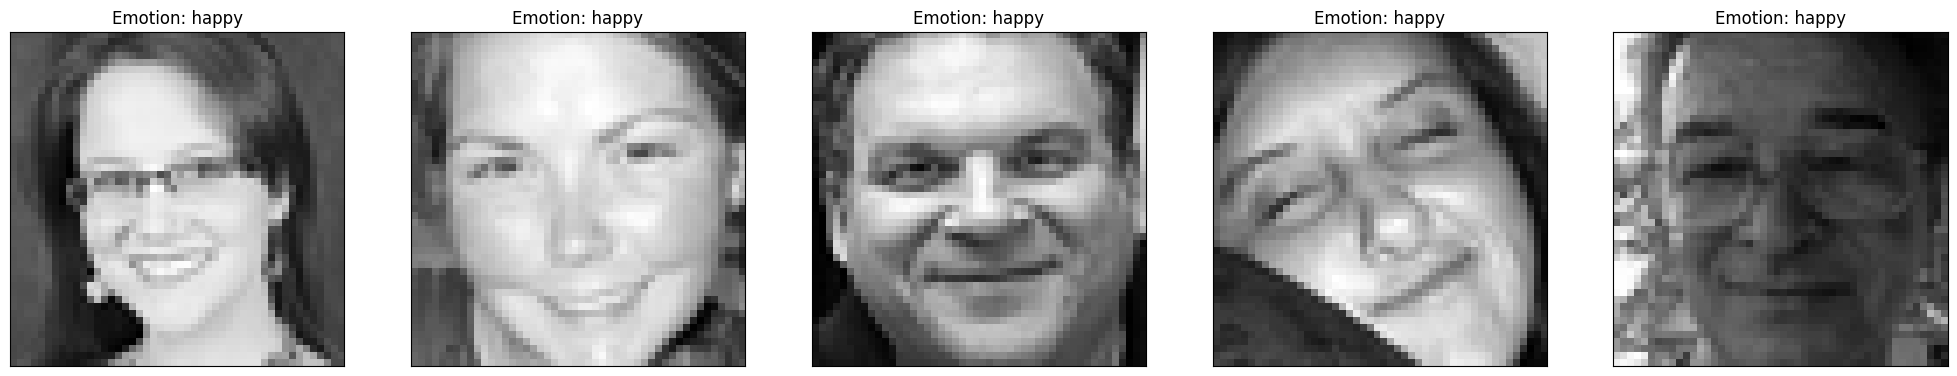

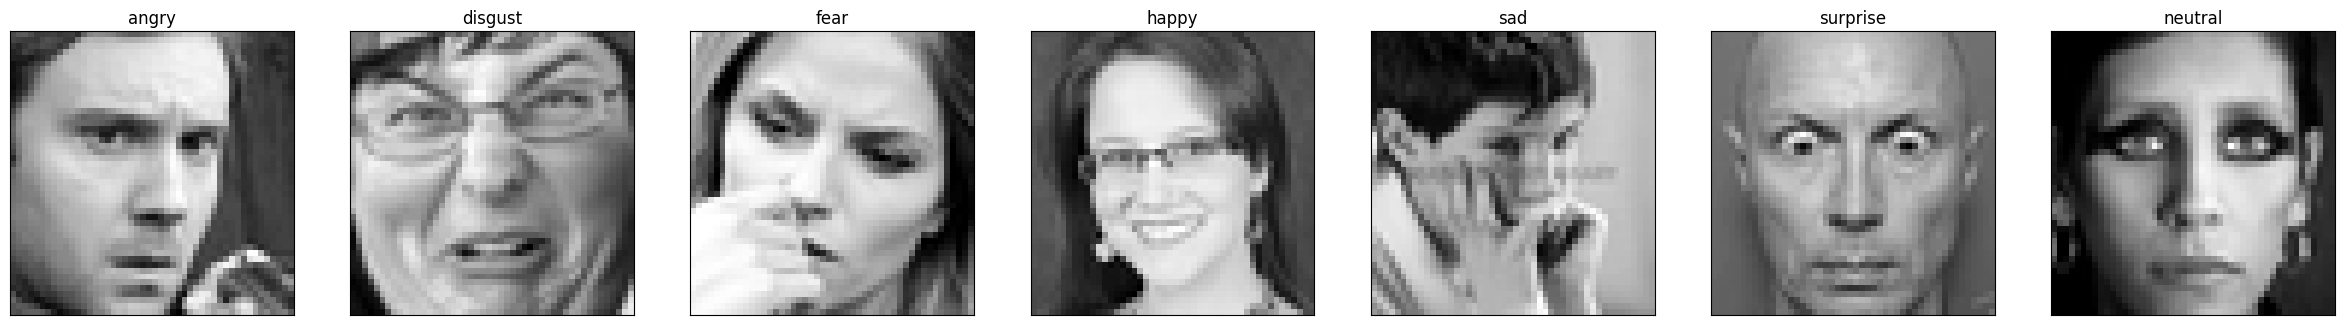

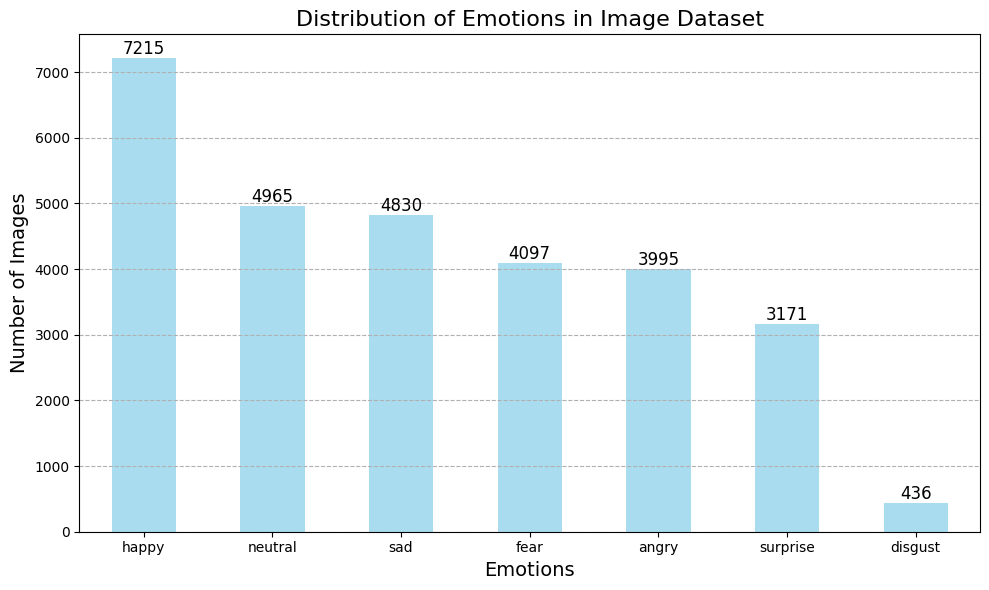

In [7]:
import matplotlib.pyplot as plt

def plot_examples(label=0):
    # Create a 1x5 grid for plotting, with each subplot displaying an example image
    fig, axs = plt.subplots(1, 5, figsize=(25, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    axs = axs.ravel()  # Flatten the array of axes for easy indexing

    # Loop to display five images of the specified emotion label
    for i in range(5):
        # Find the index of the i-th image with the given label
        idx = df_train[df_train['emotion'] == label].index[i]
        
        # Display the image in grayscale
        axs[i].imshow(df_train.loc[idx, 'image'], cmap='gray')  # Use 48x48 array directly
        
        # Set the title of the subplot to the emotion label
        axs[i].set_title(f'Emotion: {label}')
        
        # Remove axis tick labels for a cleaner look
        axs[i].set_xticks([])
        axs[i].set_yticks([])

    plt.show()

plot_examples('happy')




def plot_all_emotions():
    # Create a 1x7 grid for plotting, with each subplot displaying an example image
    fig, axs = plt.subplots(1, 7, figsize=(30, 12))
    fig.subplots_adjust(hspace=0.2, wspace=0.2)
    axs = axs.ravel()  # Flatten the array of axes for easy indexing

    # Loop through each emotion label to display one example image per emotion
    for i in range(7):
        # Get the indices for the current emotion
        indices = df_train[df_train['emotion'] == emotion_mapping[i]].index
        
        if len(indices) > 0:  # Check if there is at least one image for the current emotion
            idx = indices[0]  # Get the first index
            # Display the image in grayscale
            axs[i].imshow(df_train.loc[idx, 'image'], cmap='gray')
            # Set the title of the subplot to the emotion name
            axs[i].set_title(emotion_mapping[i])
        else:
            # If no images for this emotion, show a blank subplot
            axs[i].imshow(np.zeros((48, 48)), cmap='gray')  # Display a blank image
            axs[i].set_title(f'No {emotion_mapping[i]} example')

        # Remove axis tick labels for a cleaner look
        axs[i].set_xticks([])
        axs[i].set_yticks([])

    plt.show()

# Call the function to plot all emotions
plot_all_emotions()


def plot_emotion_distribution():
    emotion_counts = df_train['emotion'].value_counts()

    # Create a bar chart
    plt.figure(figsize=(10, 6))
    bars = emotion_counts.plot(kind='bar', color='skyblue', alpha=0.7)
    
    # Set title and labels
    plt.title('Distribution of Emotions in Image Dataset', fontsize=16)
    plt.xlabel('Emotions', fontsize=14)
    plt.ylabel('Number of Images', fontsize=14)
    
    # Set x-ticks to show emotion names
    plt.xticks(rotation=0)
    
    # Add grid lines
    plt.grid(axis='y', linestyle='--')
    
    # Annotate counts on top of the bars
    for bar in bars.patches:
        plt.annotate(bar.get_height(), 
                     (bar.get_x() + bar.get_width() / 2, bar.get_height()), 
                     ha='center', va='bottom', fontsize=12)
    
    # Display the plot
    plt.tight_layout()  # Adjust layout to make room for x-labels
    plt.show()
    
plot_emotion_distribution()


In [8]:
print(df_train['emotion'].value_counts())

emotion
happy       7215
neutral     4965
sad         4830
fear        4097
angry       3995
surprise    3171
disgust      436
Name: count, dtype: int64


In [13]:
from sklearn.utils.class_weight import compute_class_weight
unique_classes = df_train['emotion'].unique()
class_weight = compute_class_weight(class_weight='balanced', classes=unique_classes, y=df_train['emotion'])

class_weight_dict= dict(zip(unique_classes, class_weight))

In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load your data (assuming df_train is your DataFrame)
# df_train = pd.read_csv('path_to_your_data.csv')  # Uncomment and adjust this line as needed

# Define the emotion mapping
emotion_mapping = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 5,
    'neutral': 6
}

# Map the emotions to integers
df_train['emotion'] = df_train['emotion'].map(emotion_mapping)

# Prepare the features and labels
X = df_train['image'].values  # Assuming 'image' contains the image data
y = df_train['emotion'].values  # Assuming 'emotion' contains the labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape X_train and X_test to 4D tensors (num_samples, height, width, channels)
X_train = np.array([x.reshape(48, 48, 1) for x in X_train])  # Reshape each image to (48, 48, 1)
X_test = np.array([x.reshape(48, 48, 1) for x in X_test])    # Same for test set

# Convert labels to categorical format
num_classes = 7  # Adjust based on the number of emotion classes you have
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

# Check the shapes of the data
print("X_train shape:", X_train.shape)  # Expected: (num_samples, 48, 48, 1)
print("X_test shape:", X_test.shape)    # Expected: (num_test_samples, 48, 48, 1)
print("y_train shape:", y_train.shape)  # Expected: (num_samples, num_classes)
print("y_test shape:", y_test.shape)    # Expected: (num_test_samples, num_classes)

# Define the model
model = models.Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(48, 48, 1)))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPool2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
class_weight_dict = dict(zip(range(num_classes), class_weight))  # Ensure class_weight is defined appropriately

# Early Stopping
early_stopping = EarlyStopping(monitor='val_acc', patience=5, restore_best_weights=True)

history = model.fit(X_train, y_train, 
                    validation_data=(X_test, y_test),
                    class_weight=class_weight_dict, 
                    epochs=100, 
                    batch_size=64,
                    callbacks=[early_stopping]
                    )

# Print the history to check accuracy and loss
print("Training completed. History:", history.history)




ValueError: Input y contains NaN.

In [ ]:
test_loss, test_acc = model.evaluate(X_test, y_test)

In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


# ResNet50 

# ResNet50 

In [2]:
import pandas as pd
import numpy as np

df_train = pd.read_csv('/home/kavach/Dev/Facial-Emotion-Rec/FE-origional/DataSet/train.csv')

df_train['image'] = df_train['pixels'].apply(lambda x: np.array(list(map(int, x.split()))).reshape(48, 48))
df_train.drop(['pixels'], axis=1, inplace=True)

emotion_mapping = {
    0: 'angry',
    1: 'disgust',
    2: 'fear',
    3: 'happy',
    4: 'sad',
    5: 'surprise',
    6: 'neutral'
}

df_train['emotion'] = df_train['emotion'].map(emotion_mapping)

df_train.head()


from sklearn.utils.class_weight import compute_class_weight
unique_classes = df_train['emotion'].unique()
class_weight = compute_class_weight(class_weight='balanced', classes=unique_classes, y=df_train['emotion'])

class_weight_dict= dict(zip(unique_classes, class_weight))

In [3]:
from keras.applications.convnext import preprocess_input
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras import models
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import Adam
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping

# Load your data (assuming df_train is your DataFrame)
# df_train = pd.read_csv('path_to_your_data.csv')  # Uncomment and adjust this line as needed

# Define the emotion mapping
emotion_mapping = {
    'angry': 0,
    'disgust': 1,
    'fear': 2,
    'happy': 3,
    'sad': 4,
    'surprise': 5,
    'neutral': 6
}

# Map the emotions to integers
df_train['emotion'] = df_train['emotion'].map(emotion_mapping)

# Prepare the features and labels
X = df_train['image'].values  # Assuming 'image' contains the image data
y = df_train['emotion'].values  # Assuming 'emotion' contains the labels

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Reshape X_train and X_test to 4D tensors (num_samples, height, width, channels)
X_train = np.array([x.reshape(48, 48, 1) for x in X_train])  # Reshape each image to (48, 48, 1)
X_test = np.array([x.reshape(48, 48, 1) for x in X_test])    # Same for test set



# Check the shapes of the data
print("X_train shape:", X_train.shape)  # Expected: (num_samples, 48, 48, 1)
print("X_test shape:", X_test.shape)    # Expected: (num_test_samples, 48, 48, 1)
print("y_train shape:", y_train.shape)  # Expected: (num_samples, num_classes)
print("y_test shape:", y_test.shape) 

# Convert grayscale to RGB
X_train_rgb = np.repeat(X_train, 3, axis=-1)
X_test_rgb = np.repeat(X_test, 3, axis=-1)

# Normalize the images using ResNet50 preprocessing
X_train_rgb = preprocess_input(X_train_rgb)
X_test_rgb = preprocess_input(X_test_rgb)

print("X_train_rgb shape:", X_train_rgb.shape)  # Expected: (num_samples, 48, 48, 1)
print("X_test_rgb shape:", X_test_rgb.shape)    # Expected: (num_test_samples, 48, 48, 1)
print("y_train shape:", y_train.shape)  # Expected: (num_samples, num_classes)
print("y_test shape:", y_test.shape) 

# Convert labels to categorical format
num_classes = 7  # Adjust based on the number of emotion classes you have
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

X_train shape: (22967, 48, 48, 1)
X_test shape: (5742, 48, 48, 1)
y_train shape: (22967,)
y_test shape: (5742,)
X_train_rgb shape: (22967, 48, 48, 3)
X_test_rgb shape: (5742, 48, 48, 3)
y_train shape: (22967,)
y_test shape: (5742,)


In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import numpy as np
import pandas as pd
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.applications.resnet50 import preprocess_input




# Define the ResNet50 model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(48, 48, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(num_classes, activation='softmax')(x)

# Create the model
model = Model(inputs=base_model.input, outputs=predictions)

# Freeze the ResNet50 layers
for layer in base_model.layers:
    layer.trainable = False

# Compile the model
model.compile(optimizer=Adam(learning_rate=1e-3), loss='categorical_crossentropy', metrics=['accuracy'])

# Define EarlyStopping callback
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Compute the class weights based on the training data (if required)
class_weight_dict = {
    0: 1.0266046844269623,  # angry
    1: 1.0010460615781582,  # disgust
    2: 1.293372978330405,   # fear
    3: 0.5684387684387684,  # happy
    4: 0.8491274770777877,  # sad
    5: 9.406618610747051,   # surprise
    6: 0.8260394187886635   # neutral
}

# Train the model
history = model.fit(X_train_rgb, y_train, validation_data=(X_test_rgb, y_test), epochs=3, batch_size=64, class_weight=class_weight_dict, callbacks=[early_stopping])

# Check the training history
print("Training completed. History:", history.history)

2024-11-20 18:31:32.955050: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 18:31:32.958978: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-11-20 18:31:32.959078: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:995] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

Epoch 1/3


In [ ]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(14, 5))

# Accuracy plot
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

# Loss plot
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(loc='upper right')

plt.tight_layout()
plt.show()


